In [167]:
import pandas as pd
import numpy as np
from IVClassification import *
import wooldridge as woo
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [168]:
mroz = woo.dataWoo('mroz')
mroz.describe()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,428.000000,753.000000,753.000000,753.000000,...,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.00000,753.000000,428.000000,753.000000
mean,0.568393,740.576361,0.237716,1.353254,42.537849,12.286853,4.177682,1.849734,2267.270916,45.120850,...,23080.594954,0.678863,9.250996,8.808765,8.623506,0.642762,10.63081,20.128964,1.190173,178.038513
std,0.495630,871.314216,0.523959,1.319874,8.072574,2.280246,3.310282,2.419887,595.566649,8.058793,...,12190.202026,0.083496,3.367468,3.572290,3.114934,0.479504,8.06913,11.634797,0.723198,249.630849
min,0.000000,0.000000,0.000000,0.000000,30.000000,5.000000,0.128200,0.000000,175.000000,30.000000,...,1500.000000,0.441500,0.000000,0.000000,3.000000,0.000000,0.00000,-0.029057,-2.054164,0.000000
25%,0.000000,0.000000,0.000000,0.000000,36.000000,12.000000,2.262600,0.000000,1928.000000,38.000000,...,15428.000000,0.621500,7.000000,7.000000,7.500000,0.000000,4.00000,13.025040,0.816509,16.000000
50%,1.000000,288.000000,0.000000,1.000000,43.000000,12.000000,3.481900,0.000000,2164.000000,46.000000,...,20880.000000,0.691500,10.000000,7.000000,7.500000,1.000000,9.00000,17.700001,1.247574,81.000000
75%,1.000000,1516.000000,0.000000,2.000000,49.000000,13.000000,4.970750,3.580000,2553.000000,52.000000,...,28200.000000,0.721500,12.000000,12.000000,11.000000,1.000000,15.00000,24.466000,1.603571,225.000000
max,1.000000,4950.000000,3.000000,8.000000,60.000000,17.000000,25.000000,9.980000,5010.000000,60.000000,...,96000.000000,0.941500,17.000000,17.000000,14.000000,1.000000,45.00000,96.000000,3.218876,2025.000000


In [169]:
mroz.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310.0,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800.0,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040.0,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300.0,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300.0,0.6215,12,14,9.5,1,7,20.100058,1.524272,49


We are interested in the causal effect of education on inlf (in labor force or not)

In [170]:
X = mroz[['educ']]
Z = mroz[['motheduc', 'fatheduc']]
# W = mroz['faminc']
W = None
Y = mroz[['inlf']]
# V = mroz[['kidslt6', 'kidsge6', 'age', 'hushrs', 'husage', 'huseduc', 'huswage', 'mtr', 'city', 'exper']]
covar = ['kidslt6', 'kidsge6', 'age', 'hushrs', 'husage', 'huswage', 'mtr', 'city']
V = mroz[covar]

scaler = StandardScaler()
V = scaler.fit_transform(V)
V = pd.DataFrame(V, columns=covar)
X = scaler.fit_transform(X)
X = pd.DataFrame(X.reshape(-1, 1), columns=['educ'])
Z = scaler.fit_transform(Z)
Z = pd.DataFrame(Z, columns=['motheduc', 'fatheduc'])

,OLG,TSLS,GMM,ResIV
intercept,0.340782,0.322905,0.337394,0.341039
educ,0.447584,0.235566,0.294835,0.322313
kidslt6,-0.702012,-0.662990,-0.692203,-0.702068
kidsge6,0.097813,0.077468,0.099650,0.094664
age,-0.345760,-0.337407,-0.362762,-0.363590
hushrs,-0.816897,-0.793151,-0.856188,-0.815808
husage,-0.207373,-0.238293,-0.217773,-0.205226
huswage,-1.580169,-1.549807,-1.676489,-1.579086
mtr,-1.464168,-1.585040,-1.614259,-1.467959
city,-0.009613,0.010316,0.006506,-0.004406


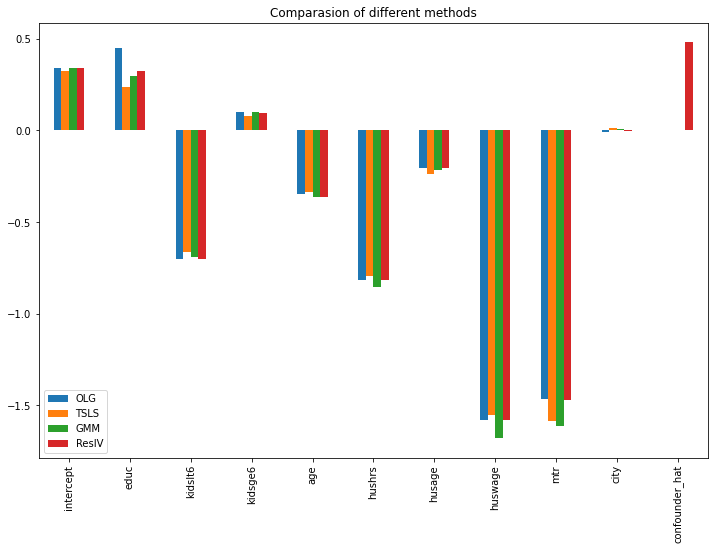

In [171]:
Var_names = ['intercept','educ', 'confounder_hat']
Var_names.extend(V.columns)

resiv = ResIV()
resiv.fit(X, Y, Z, V)
resiv_result = pd.DataFrame(resiv.coef, columns=Var_names)

lg = LogisticRegression()
lg.fit(np.concatenate([X, V], axis=1), np.array(Y).ravel())

Var_names = ['intercept', 'educ']
Var_names.extend(V.columns)

results = np.concatenate((lg.intercept_.reshape(1, -1), lg.coef_.reshape(1, -1)), axis=1)
OLG_result = pd.DataFrame(results, columns=Var_names)

tsls = Multivar_TSLS()
tsls.fit(X, Y, Z, V)
tsls_result = pd.DataFrame(tsls.coef, columns=Var_names)

GMM = Multivar_GMM()
GMM.fit(X, Y, Z, V)
GMM_result = pd.DataFrame(GMM.coef.reshape(1, -1), columns=Var_names)

# Merge all results
comparasion = pd.concat([OLG_result.T, tsls_result.T, GMM_result.T, resiv_result.T], axis=1)
comparasion.columns = ['OLG', 'TSLS', 'GMM', 'ResIV']
comparasion.plot(kind='bar', figsize = (12, 8),title='Comparasion of different methods')
comparasion

In [172]:
X = mroz[['educ']]
Z = mroz[['motheduc', 'fatheduc']]
# W = mroz['faminc']
W = None
Y = mroz[['inlf']]
# V = mroz[['kidslt6', 'kidsge6', 'age', 'hushrs', 'husage', 'huseduc', 'huswage', 'mtr', 'city', 'exper']]
covar = ['kidslt6', 'kidsge6', 'hushrs', 'husage', 'huswage', 'mtr']
V = mroz[covar]

scaler = StandardScaler()
V = scaler.fit_transform(V)
V = pd.DataFrame(V, columns=covar)
X = scaler.fit_transform(X)
X = pd.DataFrame(X.reshape(-1, 1), columns=['educ'])
Z = scaler.fit_transform(Z)
Z = pd.DataFrame(Z, columns=['motheduc', 'fatheduc'])

,OLG,TSLS,GMM,ResIV
intercept,0.337411,0.320314,0.336479,0.337153
educ,0.451075,0.275920,0.349141,0.361950
kidslt6,-0.677742,-0.639555,-0.673919,-0.676731
kidsge6,0.134222,0.114863,0.140798,0.133254
hushrs,-0.821488,-0.797852,-0.865572,-0.820850
husage,-0.491201,-0.509181,-0.512489,-0.499788
huswage,-1.586365,-1.550648,-1.684364,-1.583768
mtr,-1.457754,-1.577620,-1.594094,-1.460435
confounder_hat,NaN,NaN,NaN,0.472621


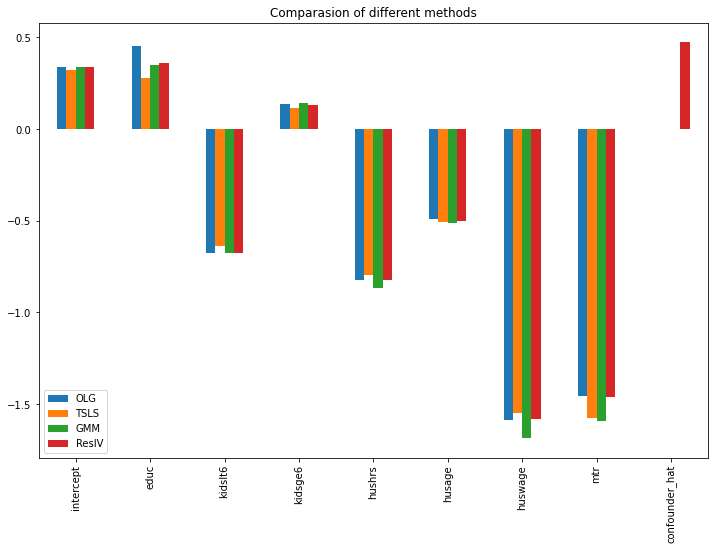

In [173]:
Var_names = ['intercept','educ', 'confounder_hat']
Var_names.extend(V.columns)

resiv = ResIV()
resiv.fit(X, Y, Z, V)
resiv_result = pd.DataFrame(resiv.coef, columns=Var_names)


lg = LogisticRegression()
lg.fit(np.concatenate([X, V], axis=1), np.array(Y).ravel())

Var_names = ['intercept', 'educ']
Var_names.extend(V.columns)

results = np.concatenate((lg.intercept_.reshape(1, -1), lg.coef_.reshape(1, -1)), axis=1)
OLG_result = pd.DataFrame(results, columns=Var_names)

tsls = Multivar_TSLS()
tsls.fit(X, Y, Z, V)
tsls_result = pd.DataFrame(tsls.coef, columns=Var_names)

GMM = Multivar_GMM()
GMM.fit(X, Y, Z, V)
GMM_result = pd.DataFrame(GMM.coef.reshape(1, -1), columns=Var_names)

# Merge all results
comparasion = pd.concat([OLG_result.T, tsls_result.T, GMM_result.T, resiv_result.T], axis=1)
comparasion.columns = ['OLG', 'TSLS', 'GMM', 'ResIV']
comparasion.plot(kind='bar', figsize = (12, 8),title='Comparasion of different methods')
comparasion